# Проект: промышленность

# Фабула проекта

**Заказчик:** металлургический комбинат «Стальная птица».

**Данные:** Различные данные зафиксированные в процессе выплавки и обработки стали:
 - data_arc_new.csv — данные об электродах;
 - data_bulk_new.csv — данные о подаче сыпучих материалов (объём);
 - data_bulk_time_new.csv — данные о подаче сыпучих материалов (время);
 - data_gas_new.csv — данные о продувке сплава газом;
 - data_temp_new.csv — результаты измерения температуры;
 - data_wire_new.csv — данные о проволочных материалах (объём);
 - data_wire_time_new.csv — данные о проволочных материалах (время).

**Цель проекта:** уменьшить потребление электроэнергии на этапе обработки стали

**Задача проекта:** температуру сплава. Ваша задача — построить модель, предсказывающу температуру сплава и имитирующую технологический процесс.

*Этапы процесса*:
 1. Расплав стали и подогрев до контрольной температуры графитовыми электродами.
 2. Десульфурация стали добавлением смесей. Контроль химического состава и отбор проб
 3. Измерение температуры и химический анализ
 4. Легирование стали
 5. Разлив и доводка

**План исследования:**

- Шаг 1. Загрузка и первичный осмотр данных
- Шаг 2. Исследовательский анализ и предобработка данных
- Шаг 3. Объединение данных
- Шаг 4. Исследовательский анализ и предобработка объединенных данных
- Шаг 5. Подготовка данных
- Шаг 6. Обучение моделей машинного обучения
- Шаг 7. Выбор лучшей модели и проверка ее качества
- Шаг 8. Общий вывод и рекомендации заказчику

# Паспорт данных

Файл **data_arc_new.csv** Адрес: https://code.s3.yandex.net/datasets/data_arc_new.csv
 - **key** — номер партии;
 - **Начало нагрева дугой** — время начала нагрева;
 - **Конец нагрева дугой** — время окончания нагрева;
 - **Активная мощность** — значение активной мощности;
 - **Реактивная мощность** — значение реактивной мощности.

Файл **data_bulk_new.csv** Адрес: https://code.s3.yandex.net/datasets/data_bulk_new.csv
 - **key** — номер партии;
 - **Bulk 1 … Bulk 15** — объём подаваемого материала.

Файл **data_bulk_time_new.csv** Адрес: https://code.s3.yandex.net/datasets/data_bulk_time_new.csv
 - **key** — номер партии;
 - **Bulk 1 … Bulk 15** — время подачи материала.

Файл **data_gas_new.csv** Адрес https://code.s3.yandex.net/datasets/data_gas_new.csv
 - **key** — номер партии;
 - **Газ 1** — объём подаваемого газа.

Файл **data_temp_new.csv** Адрес https://code.s3.yandex.net/datasets/data_temp_new.csv
 - **key** — номер партии;
 - **Время замера** — время замера;
 - **Температура** — значение температуры.

Файл **data_wire_new.csv** Адрес https://code.s3.yandex.net/datasets/data_wire_new.csv
 - **key** — номер партии;
 - **Wire 1 … Wire 9** — объём подаваемых проволочных материалов.

Файл **data_wire_time_new.csv** Адрес https://code.s3.yandex.net/datasets/data_wire_time_new.csv
 - **key** — номер партии;
 - **Wire 1 … Wire 9** — время подачи проволочных материалов.

**Примечание к паспорту:** Во всех файлах столбец ***key*** содержит номер партии. В файлах может быть несколько строк с одинаковым значением ***key***: они соответствуют разным итерациям обработки. Данные также находятся в тренажёре, в папке ***/datasets/***.

## Шаг. Загрузка и первичный осмотр данных

**Задача этапа:** Загрузить данные и выполните их первичный осмотр

In [ ]:
pip list # изучим список установленных библиотек

Package                           Version
--------------------------------- -------------------
absl-py                           1.2.0
alembic                           1.6.5
anyio                             3.2.1
argon2-cffi                       20.1.0
astunparse                        1.6.3
async-generator                   1.10
attrs                             21.2.0
Babel                             2.9.1
backcall                          0.2.0
backports.functools-lru-cache     1.6.4
beautifulsoup4                    4.9.3
bleach                            3.3.0
blinker                           1.4
blis                              0.7.8
branca                            0.5.0
brotlipy                          0.7.0
cachetools                        5.2.0
catalogue                         2.0.8
catboost                          1.0.3
certifi                           2022.6.15
certipy                           0.1.3
cffi                              1.14.5
chardet             

In [ ]:
!pip install phik -q # установим библиотеку phik

In [ ]:
import base64
import gc
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import phik
import seaborn as sns
import time
import warnings

from datetime import datetime
from IPython.display import display, HTML, Markdown
from phik import phik_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

warnings.filterwarnings('ignore')

In [ ]:
RS = 171125

In [ ]:
# подготовленная функция для загрузки данных в датафрейм
def data_load(pth1, pth2):
    if os.path.exists(pth1):
        return pd.read_csv(pth1)
    else:
        try:
            response = requests.get(pth2)
            if response.status_code == 200:
                print("Запрос успешен. Загрузка данных...")
                return pd.read_csv(pth2)
            else:
                print(f"Ошибка: {response.status_code}")
        except requests.exceptions.RequestException as e:
            print(f"Ошибка при запросе: {e}")

In [ ]:
#загрузка данных в датафреймы
data_arc = data_load('/datasets/data_arc_new.csv',
                     'https://code.s3.yandex.net/datasets/data_arc_new.csv')
data_bulk = data_load('/datasets/data_bulk_new.csv',
                      'https://code.s3.yandex.net/datasets/data_bulk_new.csv')
data_bulk_time = data_load('/datasets/data_bulk_time_new.csv',
                           'https://code.s3.yandex.net/datasets/data_bulk_time_new.csv')
data_gas = data_load('/datasets/data_gas_new.csv',
                     'https://code.s3.yandex.net/datasets/data_gas_new.csv')
data_temp = data_load('/datasets/data_temp_new.csv',
                      'https://code.s3.yandex.net/datasets/data_temp_new.csv')
data_wire = data_load('/datasets/data_wire_new.csv',
                      'https://code.s3.yandex.net/datasets/data_wire_new.csv')
data_wire_time = data_load('/datasets/data_wire_time_new.csv',
                           'https://code.s3.yandex.net/datasets/data_wire_time_new.csv')

## Шаг. Исследовательский анализ и предобработка данных

**Задача этапа:** Выполнить исследовательский анализ каждого датафрейма и, при необходимости, выполнить предобработку. Сделать выводы об имеющихся признаках: понадобятся ли они для обучения моделей.

### Первичный анализ данных

Для начала изучим общую информацию о датафреймах

In [ ]:
# общая информация о датафреймах
data_arc.info()
data_bulk.info()
data_bulk_time.info()
data_gas.info()
data_temp.info()
data_wire.info()
data_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-n

Видим, что у некоторых признаков некорректные форматы данных, это может помешать статистическому анализу данных, исправим форматы, до статистического исследования, чтобы оно было корректным:
 - "key" переведем в строковый вид, так как это идентификатор
 - значения с датами/временем переведем в формат даты

In [ ]:
data_arc['key'] = data_arc['key'].astype(str)
data_arc['Начало нагрева дугой'] = pd.to_datetime(data_arc['Начало нагрева дугой'])
data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'])
display(data_arc.dtypes)

data_bulk['key'] = data_bulk['key'].astype(str)
display(data_bulk.dtypes)

data_bulk_time['key'] = data_bulk_time['key'].astype(str)
data_bulk_convert = [col for col in data_bulk_time.columns if col != 'key']
data_bulk_time[data_bulk_convert] = data_bulk_time[data_bulk_convert].apply(pd.to_datetime)
display(data_bulk_time.dtypes)

data_gas['key'] = data_gas['key'].astype(str)
display(data_gas.dtypes)

data_temp['key'] = data_temp['key'].astype(str)
data_temp['Время замера'] = pd.to_datetime(data_temp['Время замера'])
display(data_temp.dtypes)

data_wire['key'] = data_wire['key'].astype(str)
display(data_wire.dtypes)

data_wire_time['key'] = data_wire_time['key'].astype(str)
data_wire_convert = [col for col in data_wire_time.columns if col != 'key']
data_wire_time[data_wire_convert] = data_wire_time[data_wire_convert].apply(pd.to_datetime)
display(data_wire_time.dtypes)

key                             object
Начало нагрева дугой    datetime64[ns]
Конец нагрева дугой     datetime64[ns]
Активная мощность              float64
Реактивная мощность            float64
dtype: object

key         object
Bulk 1     float64
Bulk 2     float64
Bulk 3     float64
Bulk 4     float64
Bulk 5     float64
Bulk 6     float64
Bulk 7     float64
Bulk 8     float64
Bulk 9     float64
Bulk 10    float64
Bulk 11    float64
Bulk 12    float64
Bulk 13    float64
Bulk 14    float64
Bulk 15    float64
dtype: object

key                object
Bulk 1     datetime64[ns]
Bulk 2     datetime64[ns]
Bulk 3     datetime64[ns]
Bulk 4     datetime64[ns]
Bulk 5     datetime64[ns]
Bulk 6     datetime64[ns]
Bulk 7     datetime64[ns]
Bulk 8     datetime64[ns]
Bulk 9     datetime64[ns]
Bulk 10    datetime64[ns]
Bulk 11    datetime64[ns]
Bulk 12    datetime64[ns]
Bulk 13    datetime64[ns]
Bulk 14    datetime64[ns]
Bulk 15    datetime64[ns]
dtype: object

key       object
Газ 1    float64
dtype: object

key                     object
Время замера    datetime64[ns]
Температура            float64
dtype: object

key        object
Wire 1    float64
Wire 2    float64
Wire 3    float64
Wire 4    float64
Wire 5    float64
Wire 6    float64
Wire 7    float64
Wire 8    float64
Wire 9    float64
dtype: object

key               object
Wire 1    datetime64[ns]
Wire 2    datetime64[ns]
Wire 3    datetime64[ns]
Wire 4    datetime64[ns]
Wire 5    datetime64[ns]
Wire 6    datetime64[ns]
Wire 7    datetime64[ns]
Wire 8    datetime64[ns]
Wire 9    datetime64[ns]
dtype: object

После корректировки форматов, воспользуемся функцией для статистического анализа информации

<div class = 'alert alert-info'>
Вместо привычного "ручного" EDA для этой работы сперва хотел подключить SweetViz, она удобная, но на английском языке, а если заказчик русский, то и результаты EDA необходимо предоставлять на русском языке, в интерактивном виде, с возможностью сохранения артефактов. Так что, с помощью Дипсика, нагенерировал вот такую функцию, как аналог SweetViz-а.
Да, немного кривоватая, требует доработки и с дизайном поработать надо, но это все потом. На текущем этапе важно упростить анализ нескольких датафреймов.
В дальнейшем буду развивать ее как самостоятельный проект для упрощения EDA в разных доменных зонах

In [ ]:
def create_advanced_data_report(*dataframes, names=None):
# отчет для нескольких датафреймов

    if names is None:
        names = [f"Датафрейм {i+1}" for i in range(len(dataframes))]
    elif len(names) != len(dataframes):
        names = [f"Датафрейм {i+1}" for i in range(len(dataframes))]

    # Создаем вкладки для разных датафреймов
    tabs = widgets.Tab()
    tab_outputs = []

    for i, (df, name) in enumerate(zip(dataframes, names)):
        output = widgets.Output()
        tab_outputs.append(output)

        with output:
            create_single_dataframe_report(df, name)

    tabs.children = tab_outputs
    for i, name in enumerate(names):
        tabs.set_title(i, name)

    display(tabs)

def create_single_dataframe_report(data, name="Датафрейм"):
# Отчет для одного датафрейма

    # Создаем аккордеон для организации информации
    accordion = widgets.Accordion(children=[
        widgets.Output(),  # 0 - Обзор
        widgets.Output(),  # 1 - Типы данных
        widgets.Output(),  # 2 - Пропуски
        widgets.Output(),  # 3 - Дубликаты
        widgets.Output(),  # 4 - Временные данные
        widgets.Output(),  # 5 - Статистический анализ
        widgets.Output(),  # 6 - Графический анализ
        widgets.Output(),  # 7 - Корреляционный анализ
        widgets.Output(),  # 8 - Категориальные данные
        widgets.Output(),  # 9 - Примеры данных
    ])

    accordion.set_title(0, '📊 Общий обзор')
    accordion.set_title(1, '🔧 Типы данных')
    accordion.set_title(2, '⚠️ Пропущенные значения')
    accordion.set_title(3, '🔄 Дубликаты')
    accordion.set_title(4, '⏰ Временные данные')
    accordion.set_title(5, '📈 Статистический анализ')
    accordion.set_title(6, '📊 Графический анализ')
    accordion.set_title(7, '🔗 Корреляционный анализ')
    accordion.set_title(8, '📝 Категориальные данные')
    accordion.set_title(9, '👀 Примеры данных')

    # Заполняем все вкладки
    _fill_overview_tab(accordion.children[0], data, name)
    _fill_dtypes_tab(accordion.children[1], data)
    _fill_missing_tab(accordion.children[2], data)
    _fill_duplicates_tab(accordion.children[3], data)
    _fill_temporal_tab(accordion.children[4], data)
    _fill_statistical_analysis_tab(accordion.children[5], data)
    _fill_graphical_analysis_tab(accordion.children[6], data)
    _fill_correlation_tab(accordion.children[7], data)
    _fill_categorical_tab(accordion.children[8], data)
    _fill_examples_tab(accordion.children[9], data)

    # Кнопки экспорта
    export_buttons = widgets.HBox([
        widgets.Button(description="Сохранить сводку в TXT", button_style='primary'),
        widgets.Button(description="Экспорт в HTML", button_style='success'),
        widgets.Button(description="Сгенерировать PDF", button_style='info')
    ])

    def save_summary(b):
        summary = _generate_text_summary(data, name)
        filename = f"data_analysis_summary_{name.replace(' ', '_')}.txt"
        with open(filename, "w", encoding="utf-8") as f:
            f.write(summary)
        print(f"📄 Текстовая сводка сохранена как '{filename}'")

    def save_html(b):
        html_content = _generate_html_report(data, name)
        filename = f"data_analysis_report_{name.replace(' ', '_')}.html"
        with open(filename, "w", encoding="utf-8") as f:
            f.write(html_content)
        print(f"🌐 HTML отчет сохранен как '{filename}'")

    def save_pdf(b):
        print("📊 Функция экспорта в PDF требует установки дополнительных библиотек")
        print("Установите: pip install weasyprint")

    export_buttons.children[0].on_click(save_summary)
    export_buttons.children[1].on_click(save_html)
    export_buttons.children[2].on_click(save_pdf)

    # Отображаем все элементы
    display(HTML("<h2>📤 Экспорт отчета</h2>"))
    display(export_buttons)
    display(accordion)

def _fill_overview_tab(output, data, name):
# Заполнение вкладки "Общий обзор"

    with output:
        display(HTML(f"<h1>📊 {name} - Общая информация</h1>"))

        # Основная информация
        total_cells = data.shape[0] * data.shape[1]
        missing_cells = data.isna().sum().sum()
        missing_percent_total = (missing_cells / total_cells * 100) if total_cells > 0 else 0
        datetime_cols = data.select_dtypes(include=['datetime64', 'timedelta64']).columns
        num_datetime_cols = len(datetime_cols)

        # Карточки с информацией
        cards_html = f"""
        <div style="display: grid; grid-template-columns: repeat(4, 1fr); gap: 15px; margin: 20px 0;">
            <div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); color: white; padding: 20px; border-radius: 10px;">
                <h3>📏 Размер данных</h3>
                <p style="font-size: 24px; margin: 10px 0;"><strong>{data.shape[0]:,}</strong> строк</p>
                <p style="font-size: 24px; margin: 10px 0;"><strong>{data.shape[1]}</strong> столбцов</p>
            </div>
            <div style="background: linear-gradient(135deg, #f093fb 0%, #f5576c 100%); color: white; padding: 20px; border-radius: 10px;">
                <h3>💾 Память</h3>
                <p style="font-size: 24px; margin: 10px 0;"><strong>{data.memory_usage(deep=True).sum() / 1024**2:.1f}</strong> MB</p>
            </div>
            <div style="background: linear-gradient(135deg, #4facfe 0%, #00f2fe 100%); color: white; padding: 20px; border-radius: 10px;">
                <h3>⚠️ Пропуски</h3>
                <p style="font-size: 18px; margin: 5px 0;">Всего: <strong>{missing_cells}</strong></p>
                <p style="font-size: 18px; margin: 5px 0;">Доля: <strong>{missing_percent_total:.2f}%</strong></p>
            </div>
            <div style="background: linear-gradient(135deg, #5ee7df 0%, #b490ca 100%); color: white; padding: 20px; border-radius: 10px;">
                <h3>⏰ Время</h3>
                <p style="font-size: 18px; margin: 5px 0;">Временных столбцов: <strong>{num_datetime_cols}</strong></p>
                <p style="font-size: 18px; margin: 5px 0;">Дубликаты: <strong>{data.duplicated().sum()}</strong></p>
            </div>
        </div>
        """
        display(HTML(cards_html))

        # Типы данных
        display(HTML("<h3>Распределение по типам данных</h3>"))
        dtype_summary = pd.DataFrame({
            'Тип данных': data.dtypes.value_counts().index.astype(str),
            'Количество': data.dtypes.value_counts().values
        })
        display(dtype_summary)

def _fill_dtypes_tab(output, data):
# Заполнение вкладки "Типы данных"

    with output:
        display(HTML("<h2>Детальная информация о типах данных</h2>"))

        dtype_detailed = pd.DataFrame({
            'Столбец': data.columns,
            'Тип данных': data.dtypes.values,
            'Уникальных значений': [data[col].nunique() for col in data.columns],
            'Заполненность (%)': [(1 - data[col].isna().mean()) * 100 for col in data.columns]
        })
        dtype_detailed['Заполненность (%)'] = dtype_detailed['Заполненность (%)'].round(2)
        display(dtype_detailed)

def _fill_missing_tab(output, data):
# Заполнение вкладки 'Пропущенные значения'

    with output:
        display(HTML("<h2>Детальный анализ пропущенных значений</h2>"))

        total_cells = data.shape[0] * data.shape[1]
        missing_cells = data.isna().sum().sum()
        missing_percent_total = (missing_cells / total_cells * 100) if total_cells > 0 else 0

        missing_data = pd.DataFrame({
            'Столбец': data.columns,
            'Пропущено': data.isna().sum().values,
            'Доля от столбца (%)': (data.isna().sum().values / len(data) * 100).round(2),
            'Доля от всех пропусков (%)': (data.isna().sum().values / data.isna().sum().sum() * 100).round(2)
            if data.isna().sum().sum() > 0 else [0] * len(data.columns)
        })
        missing_data = missing_data[missing_data['Пропущено'] > 0]

        if len(missing_data) > 0:
            display(HTML(f"<h3>Всего пропусков: {data.isna().sum().sum()} ({missing_percent_total:.2f}% от всех ячеек)</h3>"))
            display(missing_data)

            # Визуализация пропусков
            plt.figure(figsize=(12, 6))
            missing_vals = data.isna().sum()
            missing_vals = missing_vals[missing_vals > 0]

            if len(missing_vals) > 0:
                plt.subplot(1, 2, 1)
                plt.bar(missing_vals.index, missing_vals.values)
                plt.title('Количество пропусков по столбцам')
                plt.xticks(rotation=45)

                plt.subplot(1, 2, 2)
                missing_percent = (missing_vals / len(data) * 100).round(2)
                plt.bar(missing_percent.index, missing_percent.values, color='orange')
                plt.title('Доля пропусков по столбцам (%)')
                plt.xticks(rotation=45)

                plt.tight_layout()
                plt.show()
        else:
            display(HTML('<div style="background: #d4edda; color: #155724; padding: 20px; border-radius: 5px; text-align: center;">'
                        '<h3>✅ Отлично!</h3><p>Пропущенных значений не обнаружено</p></div>'))

def _fill_duplicates_tab(output, data):
#Заполнение вкладки 'Дубликаты'

    with output:
        display(HTML("<h2>Анализ дубликатов</h2>"))

        full_duplicates = data.duplicated()
        full_duplicates_count = full_duplicates.sum()

        if full_duplicates_count > 0:
            display(HTML(f'<h3 style="color: orange;">⚠️ Найдено полных дубликатов: {full_duplicates_count}</h3>'))
            display(HTML("<h4>Список полных дубликатов:</h4>"))
            display(data[full_duplicates])

            # Анализ наиболее частых дубликатов
            display(HTML("<h4>Наиболее частые дубликаты:</h4>"))
            duplicate_groups = data[data.duplicated(keep=False)].groupby(list(data.columns)).size().reset_index(name='Количество')
            duplicate_groups = duplicate_groups[duplicate_groups['Количество'] > 1].sort_values('Количество', ascending=False)
            display(duplicate_groups.head(10))
        else:
            display(HTML('<p style="color: green;">✅ Полных дубликатов не обнаружено</p>'))

def _fill_temporal_tab(output, data):
# Заполнение вкладки 'Временные данные'

    with output:
        display(HTML("<h2>⏰ Анализ временных данных</h2>"))

        datetime_cols = data.select_dtypes(include=['datetime64', 'timedelta64']).columns

        if len(datetime_cols) > 0:
            for col in datetime_cols:
                display(HTML(f"<h3>📅 Столбец: {col}</h3>"))

                missing_count = data[col].isna().sum()
                unique_count = data[col].nunique()

                display(HTML(f"""
                <div style="background: #e8f4fd; padding: 15px; border-radius: 8px; margin: 10px 0;">
                    <strong>Тип данных:</strong> {data[col].dtype} |
                    <strong>Уникальных значений:</strong> {unique_count} |
                    <strong>Пропусков:</strong> {missing_count} ({(missing_count/len(data)*100):.2f}%)
                </div>
                """))

                temporal_data = data[col].dropna()
                if len(temporal_data) > 1:
                    is_sorted = temporal_data.is_monotonic_increasing
                    sort_status = "✅ Хронологически упорядочен" if is_sorted else "⚠️ Не хронологически упорядочен"
                    display(HTML(f"<p><strong>Хронологический порядок:</strong> {sort_status}</p>"))

                    min_date = temporal_data.min()
                    max_date = temporal_data.max()
                    date_range = max_date - min_date

                    display(HTML(f"""
                    <div style="background: #fff3cd; padding: 10px; border-radius: 5px; margin: 10px 0;">
                        <strong>Временной диапазон:</strong><br>
                        • Начало: {min_date}<br>
                        • Конец: {max_date}<br>
                        • Продолжительность: {date_range}
                    </div>
                    """))

                    # Хронологически первые 5 значений
                    display(HTML("<h4>🕐 Хронологически первые 5 значений:</h4>"))
                    chronological_first = temporal_data.nsmallest(5)
                    first_df = pd.DataFrame({
                        'Значение': chronological_first.values,
                        'Порядковый номер': [data.index[data[col] == val].tolist()[0] for val in chronological_first.values]
                    })
                    display(first_df)

                    # Хронологически последние 5 значений
                    display(HTML("<h4>🕙 Хронологически последние 5 значений:</h4>"))
                    chronological_last = temporal_data.nlargest(5)
                    last_df = pd.DataFrame({
                        'Значение': chronological_last.values,
                        'Порядковый номер': [data.index[data[col] == val].tolist()[0] for val in chronological_last.values]
                    })
                    display(last_df)

                else:
                    display(HTML('<p style="color: orange;">⚠️ Недостаточно данных для анализа временной последовательности</p>'))

                display(HTML("<hr>"))
        else:
            display(HTML('<div style="background: #f8d7da; color: #721c24; padding: 20px; border-radius: 5px; text-align: center;">'
                        '<h3>⏰ Временные данные не обнаружены</h3>'
                        '<p>В датафрейме нет столбцов с типами datetime64 или timedelta64</p></div>'))

def _fill_statistical_analysis_tab(output, data):
# Заполнение вкладки 'Статистический анализ'

    with output:
        display(HTML("<h2>📈 Статистический анализ числовых данных</h2>"))

        numeric_cols = data.select_dtypes(include=[np.number]).columns

        if len(numeric_cols) > 0:
            # Общая статистика
            display(HTML("<h3>📊 Описательная статистика</h3>"))
            stats_df = data[numeric_cols].describe().T
            stats_df['variance'] = data[numeric_cols].var()
            stats_df['skewness'] = data[numeric_cols].skew()
            stats_df['kurtosis'] = data[numeric_cols].kurtosis()
            stats_df['missing'] = data[numeric_cols].isna().sum()
            stats_df['missing_pct'] = (stats_df['missing'] / len(data) * 100).round(2)

            # Переименовываем столбцы для читаемости
            stats_df = stats_df.rename(columns={
                'count': 'Количество',
                'mean': 'Среднее',
                'std': 'Станд. отклонение',
                'min': 'Минимум',
                '25%': '25% перцентиль',
                '50%': 'Медиана',
                '75%': '75% перцентиль',
                'max': 'Максимум',
                'variance': 'Дисперсия',
                'skewness': 'Асимметрия',
                'kurtosis': 'Эксцесс',
                'missing': 'Пропуски',
                'missing_pct': 'Пропуски (%)'
            })

            # Форматируем числовые столбцы
            numeric_format_cols = ['Среднее', 'Станд. отклонение', 'Минимум', '25% перцентиль',
                                 'Медиана', '75% перцентиль', 'Максимум', 'Дисперсия',
                                 'Асимметрия', 'Эксцесс']

            for col in numeric_format_cols:
                if col in stats_df.columns:
                    stats_df[col] = stats_df[col].round(4)

            display(stats_df)

            # Детальный анализ по каждому числовому столбцу
            display(HTML("<h3>🔍 Детальный анализ по столбцам</h3>"))
            for col in numeric_cols:
                _display_detailed_numeric_stats(col, data)
        else:
            display(HTML('<div style="background: #f8d7da; color: #721c24; padding: 20px; border-radius: 5px; text-align: center;">'
                        '<h3>📊 Числовые данные не обнаружены</h3>'
                        '<p>В датафрейме нет числовых колонок для статистического анализа</p></div>'))

def _display_detailed_numeric_stats(col, data):
# Отображение детальной статистики для числового столбца

    display(HTML(f"<h4>📋 Детальный анализ: {col}</h4>"))

    col_data = data[col].dropna()

    if len(col_data) > 0:
        # Основные статистики
        stats = {
            'Количество значений': len(col_data),
            'Пропущенные значения': data[col].isna().sum(),
            'Доля пропусков (%)': round(data[col].isna().sum() / len(data) * 100, 2),
            'Среднее значение': round(col_data.mean(), 4),
            'Медиана': round(col_data.median(), 4),
            'Стандартное отклонение': round(col_data.std(), 4),
            'Дисперсия': round(col_data.var(), 4),
            'Минимум': round(col_data.min(), 4),
            'Максимум': round(col_data.max(), 4),
            'Размах': round(col_data.max() - col_data.min(), 4),
            'Асимметрия': round(col_data.skew(), 4),
            'Эксцесс': round(col_data.kurtosis(), 4),
            'Q1 (25% перцентиль)': round(col_data.quantile(0.25), 4),
            'Q3 (75% перцентиль)': round(col_data.quantile(0.75), 4),
            'IQR': round(col_data.quantile(0.75) - col_data.quantile(0.25), 4)
        }

        # Анализ выбросов
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
        stats['Нижняя граница выбросов'] = round(lower_bound, 4)
        stats['Верхняя граница выбросов'] = round(upper_bound, 4)
        stats['Количество выбросов'] = len(outliers)
        stats['Доля выбросов (%)'] = round(len(outliers) / len(col_data) * 100, 2)

        # Интерпретация асимметрии
        skewness = stats['Асимметрия']
        if abs(skewness) < 0.5:
            skew_interpretation = "Примерно симметричное"
        elif 0.5 <= abs(skewness) < 1:
            skew_interpretation = "Умеренно асимметричное"
        else:
            skew_interpretation = "Сильно асимметричное"

        stats['Интерпретация асимметрии'] = skew_interpretation

        # Создаем DataFrame для отображения
        stats_df = pd.DataFrame(list(stats.items()), columns=['Метрика', 'Значение'])
        display(stats_df)

        # Дополнительная информация
        display(HTML(f"""
        <div style="background: #f8f9fa; padding: 15px; border-radius: 8px; margin: 10px 0;">
            <strong>📝 Интерпретация распределения:</strong><br>
            • <strong>Асимметрия ({skewness:.3f}):</strong> {skew_interpretation} распределение<br>
            • <strong>Эксцесс ({stats['Эксцесс']:.3f}):</strong> {'Платикуртическое' if stats['Эксцесс'] < 0 else 'Лептокуртическое' if stats['Эксцесс'] > 0 else 'Мезокуртическое'} распределение<br>
            • <strong>Выбросы:</strong> {stats['Количество выбросов']} значений ({stats['Доля выбросов (%)']}%) за пределами [{lower_bound:.2f}, {upper_bound:.2f}]
        </div>
        """))

        display(HTML("<hr>"))

def _fill_graphical_analysis_tab(output, data):
# Заполнение вкладки 'Графический анализ'
    with output:
        display(HTML("<h2>📊 Графический анализ данных</h2>"))

        # Числовые данные (интервальные - больше 10 уникальных значений)
        numeric_cols = data.select_dtypes(include=[np.number]).columns
        interval_cols = [col for col in numeric_cols if data[col].nunique() > 10]

        if len(interval_cols) > 0:
            display(HTML("<h3>📈 Непрерывные числовые данные</h3>"))
            display(HTML(f"<p>Колонки с более чем 10 уникальными значениями: {len(interval_cols)}</p>"))

            cols_to_plot = interval_cols[:6]

            for col in cols_to_plot:
                _plot_numeric_distribution(col, data)

        # Категориальные данные
        categorical_cols = data.select_dtypes(include=['object', 'category']).columns

        if len(categorical_cols) > 0:
            display(HTML("<h3>🏷️ Категориальные данные</h3>"))
            display(HTML(f"<p>Текстовые/категориальные колонки: {len(categorical_cols)}</p>"))

            cols_to_plot = categorical_cols[:4]

            for col in cols_to_plot:
                _plot_categorical_distribution(col, data)

        if len(interval_cols) == 0 and len(categorical_cols) == 0:
            display(HTML('<div style="background: #f8d7da; color: #721c24; padding: 20px; border-radius: 5px; text-align: center;">'
                        '<h3>📊 Данные для графического анализа не обнаружены</h3>'
                        '<p>В датафрейме нет подходящих колонок для построения графиков</p></div>'))

def _plot_numeric_distribution(col, data):
# Построение графиков для числовых данных
    display(HTML(f"<h4>📈 Анализ распределения: {col}</h4>"))

    col_data = data[col].dropna()

    if len(col_data) > 0:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

        # Гистограмма с KDE
        n_bins = min(50, len(col_data) // 10)
        n_bins = max(n_bins, 10)

        ax1.hist(col_data, bins=n_bins, alpha=0.7, color='skyblue', edgecolor='black', density=True)
        col_data.plot.kde(ax=ax1, color='red', linewidth=2)
        ax1.set_title(f'Гистограмма с KDE\n{col}', fontsize=12)
        ax1.set_xlabel(col)
        ax1.set_ylabel('Плотность')

        # Статистические линии
        mean_val = col_data.mean()
        median_val = col_data.median()

        ax1.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.2f}')
        ax1.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_val:.2f}')

        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Boxplot
        ax2.boxplot(col_data, vert=True)
        ax2.set_title(f'Boxplot распределения\n{col}', fontsize=12)
        ax2.set_ylabel(col)
        ax2.grid(True, alpha=0.3)

        # Q-Q plot
        from scipy import stats
        stats.probplot(col_data, dist="norm", plot=ax3)
        ax3.set_title(f'Q-Q plot (нормальность)\n{col}', fontsize=12)

        # Эмпирическая CDF
        sorted_data = np.sort(col_data)
        y_vals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        ax4.plot(sorted_data, y_vals, linewidth=2)
        ax4.set_title(f'Эмпирическая CDF\n{col}', fontsize=12)
        ax4.set_xlabel(col)
        ax4.set_ylabel('Вероятность')
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Тест на нормальность (для больших выборок)
        if len(col_data) >= 20:
            from scipy.stats import shapiro
            stat, p_value = shapiro(col_data)
            normality = "нормальное" if p_value > 0.05 else "ненормальное"

            display(HTML(f"""
            <div style="background: #e8f4fd; padding: 10px; border-radius: 5px; margin: 10px 0;">
                <strong>📊 Тест Шапиро-Уилка на нормальность:</strong><br>
                • Статистика: {stat:.4f}<br>
                • p-value: {p_value:.4f}<br>
                • Заключение: Распределение <strong>{normality}</strong> (p-value {'>' if p_value > 0.05 else '<'} 0.05)
            </div>
            """))
    else:
        display(HTML(f'<p style="color: orange;">⚠️ Недостаточно данных для построения графиков в колонке {col}</p>'))

def _plot_categorical_distribution(col, data):
# Построение графиков для категориальных данных

    display(HTML(f"<h4>📋 Распределение: {col}</h4>"))

    col_data = data[col].dropna()

    if len(col_data) > 0:
        value_counts = col_data.value_counts().head(15)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Countplot (горизонтальный)
        bars = ax1.barh(range(len(value_counts)), value_counts.values, color='lightgreen', alpha=0.7)
        ax1.set_title(f'Countplot распределения\n{col}', fontsize=12)
        ax1.set_xlabel('Количество')
        ax1.set_ylabel('Категории')
        ax1.set_yticks(range(len(value_counts)))
        ax1.set_yticklabels(value_counts.index)

        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax1.text(width, bar.get_y() + bar.get_height()/2.,
                    f'{int(width)}', ha='left', va='center')

        ax1.grid(True, alpha=0.3)

        # Круговая диаграмма
        top_8 = value_counts.head(8)
        if len(top_8) > 1:
            ax2.pie(top_8.values, labels=top_8.index, autopct='%1.1f%%', startangle=90)
            ax2.set_title(f'Топ-8 категорий\n{col}', fontsize=12)
        else:
            ax2.text(0.5, 0.5, 'Недостаточно\nкатегорий', ha='center', va='center',
                    transform=ax2.transAxes, fontsize=12)
            ax2.set_title(f'Распределение категорий\n{col}', fontsize=12)

        plt.tight_layout()
        plt.show()

        # Дополнительная информация
        display(HTML(f"""
        <div style="background: #f8f9fa; padding: 10px; border-radius: 5px; margin: 10px 0;">
            <strong>Статистика по колонке {col}:</strong><br>
            • Всего уникальных категорий: {col_data.nunique()}<br>
            • Самая частая категория: "{value_counts.index[0]}" ({value_counts.values[0]} записей)<br>
            • Доля самой частой категории: {(value_counts.values[0]/len(col_data)*100):.1f}%<br>
            • Энтропия распределения: {_calculate_entropy(value_counts):.3f}
        </div>
        """))
    else:
        display(HTML(f'<p style="color: orange;">⚠️ Недостаточно данных для построения графиков в колонке {col}</p>'))

def _calculate_entropy(value_counts):
# Вычисление энтропии распределения категорий
    probabilities = value_counts / value_counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

def _fill_correlation_tab(output, data):
# Заполнение вкладки 'Корреляционный анализ'
    with output:
        display(HTML("<h2>🔗 Корреляционный анализ</h2>"))

        numeric_cols_for_corr = [col for col in data.select_dtypes(include=[np.number]).columns
                               if data[col].nunique() > 10 and data[col].notna().sum() > 0]

        if len(numeric_cols_for_corr) >= 2:
            _display_correlation_analysis(data, numeric_cols_for_corr)
        else:
            display(HTML('<div style="background: #f8d7da; color: #721c24; padding: 20px; border-radius: 5px; text-align: center;">'
                        '<h3>🔗 Недостаточно данных для корреляционного анализа</h3>'
                        '<p>Нужно как минимум 2 числовых колонки с более чем 10 уникальными значениями</p></div>'))

def _display_correlation_analysis(data, numeric_cols):
# Отображение анализа корреляций

    # Таблица корреляций Пирсона
    display(HTML("<h3>📈 Таблица корреляций (Пирсон)</h3>"))
    corr_matrix = data[numeric_cols].corr()
    display(corr_matrix.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
           .format('{:.3f}'))

    # Heatmap корреляций
    display(HTML("<h3>🎨 Heatmap корреляций</h3>"))
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
               square=True, fmt='.3f', cbar_kws={"shrink": .8}, linewidths=0.5)
    plt.title('Матрица корреляций Пирсона (числовые данные)', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

    # Анализ сильных корреляций
    _display_strong_correlations(corr_matrix)

def _display_strong_correlations(corr_matrix):
# Отображение сильных корреляции

    display(HTML("<h3>📊 Анализ сильных корреляций</h3>"))

    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = abs(corr_matrix.iloc[i, j])
            if corr_value > 0.7:
                high_corr_pairs.append({
                    'Переменная 1': corr_matrix.columns[i],
                    'Переменная 2': corr_matrix.columns[j],
                    'Корреляция': corr_matrix.iloc[i, j],
                    'Абс. корреляция': corr_value
                })

    if len(high_corr_pairs) > 0:
        high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Абс. корреляция', ascending=False)
        display(HTML("<h4>🔗 Сильные корреляции (|r| > 0.7)</h4>"))
        display(high_corr_df.style.background_gradient(subset=['Корреляция'], cmap='coolwarm'))
    else:
        display(HTML('<p style="color: green;">✅ Сильных корреляций (|r| > 0.7) не обнаружено</p>'))

def _fill_categorical_tab(output, data):
# Заполнение вкладки 'Категориальные данные'

    with output:
        display(HTML("<h2>📝 Детальный анализ категориальных данных</h2>"))

        categorical_data = data.select_dtypes(include=['object', 'category']).columns

        if len(categorical_data) > 0:
            for col in categorical_data:
                _display_categorical_column_info(col, data)
        else:
            display(HTML("<p>Нет категориальных столбцов для анализа</p>"))

def _display_categorical_column_info(col, data):
# Отображение информации о категориальной колонке

    display(HTML(f"<h3>📋 Столбец: {col}</h3>"))

    unique_count = data[col].nunique()
    missing_count = data[col].isna().sum()

    display(HTML(f"""
    <div style="background: #f8f9fa; padding: 10px; border-radius: 5px; margin: 10px 0;">
        <strong>Уникальных значений:</strong> {unique_count} |
        <strong>Пропусков:</strong> {missing_count} ({(missing_count/len(data)*100):.2f}%)
    </div>
    """))

    if _is_textual_data(data[col]):
        display(HTML("<p><strong>Тип данных:</strong> Текстовые/буквенные обозначения</p>"))

        unique_values = data[col].dropna().unique()
        if len(unique_values) <= 20:
            display(HTML("<h4>🎯 Все уникальные значения:</h4>"))
            values_df = pd.DataFrame({
                'Значение': unique_values,
                'Количество': [data[col].value_counts().get(val, 0) for val in unique_values]
            }).sort_values('Количество', ascending=False)
            display(values_df)
        else:
            display(HTML(f"<h4>🎯 Первые 20 уникальных значений (всего {len(unique_values)}):</h4>"))
            top_values = data[col].value_counts().head(20)
            values_df = pd.DataFrame({
                'Значение': top_values.index,
                'Количество': top_values.values,
                'Доля (%)': (top_values.values / len(data) * 100).round(2)
            })
            display(values_df)
    else:
        display(HTML("<p><strong>Тип данных:</strong> Смешанные/не только текст</p>"))

    display(HTML("<hr>"))

def _fill_examples_tab(output, data):
# Заполнение вкладки 'Примеры данных'

    with output:
        display(HTML("<h2>👀 Примеры данных</h2>"))

        display(HTML("<h3>Начало данных</h3>"))
        display(data.head(8))

        display(HTML("<h3>Случайная выборка</h3>"))
        display(data.sample(8))

        display(HTML("<h3>Конец данных</h3>"))
        display(data.tail(8))

def _is_textual_data(series):
# Проверка, содержит ли серия в основном текстовые/буквенные данные

    if series.dtype == 'object':
        sample_size = min(1000, len(series.dropna()))
        if sample_size > 0:
            sample = series.dropna().sample(sample_size, random_state=42)
            text_ratio = sample.astype(str).str.isalpha().mean()
            return text_ratio > 0.7
    return False

def _generate_text_summary(data, name="Датафрейм"):
# Генерирация текстовой сводки

    total_cells = data.shape[0] * data.shape[1]
    missing_cells = data.isna().sum().sum()
    missing_percent_total = (missing_cells / total_cells * 100) if total_cells > 0 else 0

    # Анализ временных данных
    datetime_cols = data.select_dtypes(include=['datetime64', 'timedelta64']).columns
    temporal_info = ""
    if len(datetime_cols) > 0:
        temporal_info = "\nВРЕМЕННЫЕ ДАННЫЕ:\n" + "=" * 20 + "\n"
        for col in datetime_cols:
            temporal_data = data[col].dropna()
            if len(temporal_data) > 1:
                is_sorted = temporal_data.is_monotonic_increasing
                min_date = temporal_data.min()
                max_date = temporal_data.max()
                temporal_info += f"• {col}: {min_date} → {max_date} ({'упорядочен' if is_sorted else 'не упорядочен'})\n"

    summary = f"""
ОТЧЕТ ПО АНАЛИЗУ ДАННЫХ: {name}
{'=' * 60}
Дата создания: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
Размер данных: {data.shape[0]:,} строк × {data.shape[1]} столбцов
Объем памяти: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB

ОСНОВНЫЕ ХАРАКТЕРИСТИКИ:
{'=' * 30}
• Пропущенные значения: {missing_cells} ({missing_percent_total:.2f}% от всех ячеек)
• Полные дубликаты: {data.duplicated().sum()}
• Числовые столбцы: {len(data.select_dtypes(include=[np.number]).columns)}
• Категориальные столбцы: {len(data.select_dtypes(include=['object', 'category']).columns)}
• Временные столбцы: {len(datetime_cols)}

ТИПЫ ДАННЫХ:
{'=' * 15}
{data.dtypes.value_counts().to_string()}
{temporal_info}
СТОЛБЦЫ С ПРОПУСКАМИ:
{'=' * 25}
"""

    missing_data = data.isna().sum()
    missing_data = missing_data[missing_data > 0]
    if len(missing_data) > 0:
        for col, count in missing_data.items():
            percent = (count / len(data) * 100)
            summary += f"• {col}: {count} пропусков ({percent:.1f}% от столбца)\n"
    else:
        summary += "Пропусков нет\n"

    # Добавляем информацию о категориальных данных
    categorical_data = data.select_dtypes(include=['object', 'category'])
    if len(categorical_data) > 0:
        summary += f"\nКАТЕГОРИАЛЬНЫЕ ДАННЫЕ:\n{'=' * 25}\n"
        for col in categorical_data:
            unique_count = data[col].nunique()
            missing_count = data[col].isna().sum()
            summary += f"• {col}: {unique_count} уникальных значений, {missing_count} пропусков\n"

            if _is_textual_data(data[col]) and unique_count <= 20:
                unique_values = data[col].dropna().unique()
                summary += f"  Уникальные значения: {', '.join(map(str, unique_values[:10]))}"
                if len(unique_values) > 10:
                    summary += f" ... (и еще {len(unique_values)-10})"
                summary += "\n"

    return summary

def _generate_html_report(data, name="Датафрейм"):
# Генерирация HTML отчета
    datetime_cols = data.select_dtypes(include=['datetime64', 'timedelta64']).columns
    temporal_section = ""
    if len(datetime_cols) > 0:
        temporal_section = f"<p><strong>Временные столбцы:</strong> {len(datetime_cols)}</p>"
        for col in datetime_cols[:2]:
            temporal_data = data[col].dropna()
            if len(temporal_data) > 1:
                min_date = temporal_data.min()
                max_date = temporal_data.max()
                temporal_section += f"<p><strong>{col}:</strong> {min_date} → {max_date}</p>"

    html = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <meta charset="utf-8">
        <title>Анализ данных - {name}</title>
        <style>
            body {{ font-family: Arial, sans-serif; margin: 40px; }}
            h1 {{ color: #2c3e50; }}
            .card {{ background: #f8f9fa; padding: 20px; margin: 15px 0; border-radius: 10px; }}
            table {{ width: 100%; border-collapse: collapse; }}
            th, td {{ padding: 10px; text-align: left; border-bottom: 1px solid #ddd; }}
            .warning {{ color: orange; font-weight: bold; }}
            .success {{ color: green; font-weight: bold; }}
        </style>
    </head>
    <body>
        <h1>📊 Отчет по анализу данных: {name}</h1>
        <div class="card">
            <h2>Основная информация</h2>
            <p><strong>Размер:</strong> {data.shape[0]:,} строк, {data.shape[1]} столбцов</p>
            <p><strong>Память:</strong> {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB</p>
            <p><strong>Пропуски:</strong> {data.isna().sum().sum()} ({(data.isna().sum().sum()/(data.shape[0]*data.shape[1])*100):.2f}%)</p>
            <p><strong>Дубликаты:</strong> {data.duplicated().sum()}</p>
            {temporal_section}
        </div>
    </body>
    </html>
    """
    return html

# Упрощенная функция для одного датафрейма
def create_data_report_single(data, name="Датафрейм"):
    # Создает отчет для одного датафрейма (упрощенный вызов)
    create_single_dataframe_report(data, name)

# Альтернативное имя для обратной совместимости
def create_data_report(*dataframes, names=None):
    # Алиас для create_advanced_data_report
    return create_advanced_data_report(*dataframes, names=names)

# Пример использования:
# create_advanced_data_report(df1, df2, names=["Данные 1", "Данные 2"])
# create_data_report_single(df, "Мои данные")
# create_data_report(df1, df2, df3)  # для нескольких датафреймов

In [ ]:
# сфоримруем сводный отчет по нашим датафреймам
create_advanced_data_report(data_arc,
                            data_bulk,
                            data_bulk_time,
                            data_gas,
                            data_temp,
                            data_wire,
                            data_wire_time,
                            names=["Данные об электродах",
                                   "Данные о подаче сыпучих материалов (объём)",
                                   "Данные о подаче сыпучих материалов (время)",
                                   "Данные о продувке сплава газом",
                                   "Результаты измерения температуры",
                                   "Данные о проволочных материалах (объём)",
                                   "Данные о проволочных материалах (время)"
                                  ]
                           )

### Вывод по блоку

В ходе статистического анализа полученных данных, выявлены следующие обстоятельства:

 1. **data_arc** - данные об электродах:
     - датафрейм состоит из 14 876 строк и 5 столбцов признаков
     - названия столбцов в кириллическом виде
     - после приведения в норму, датайфрейм содержит один категориальный признак - key, два числовых признака и два признака в формате даты-времени
     - признаки "Начало нагрева дугой" и "Конец нагрева дугой" представляют собой время старта процесса нагревания и время окончания процесса нагревания - их заменим более удобным признаком - время нагревания в виде временного интервала.
     - временной диапазон распределен от 2019-05-03 11:02:14 до 2019-09-06 17:24:54 и составляет 126 дней 06:22:40.     
     - признак "Реактивная мощность" представляет собой паразитарную мощность электрмагнитного поля, его значение не может быть ниже 0, поэтому значение -715.479924 и любые отрицательные значения являются ошибкой, их необходимо исправить. Судя по распределению значений, мощность указана в киловатах
     - сами признаки "Активная мощность" и реактивная мощность заменими общим признаком "полная мощность", так как именно на основании это признака определяются показатели стабилизаторов напряжения (https://skat-ups.ru/vopros-otvet/activnaya-reactivnaya-mojnost/) и именно полная мощность определяет нагрузку на электросеть.
     - пропусков данных нет
     - дубликаты не выявлены
     - названия столбцов необходимо привести в единую стилистику - латиницей в "змеином" стиле.
     - признак key повторяется несколько раз - это разные итерации нагрева в процессе выплавки. Можно использовать это как один из входных признаков - количество итераций нагрева А также посчитать общую затратченную мощность на всю партию и среднюю из расчета количества итераций. Кроме того, поскольку задача заказчика - экономия электроэнергии, а так же поскольку для любого заказчика одним из важнейших показателей всегда является экономика процесса, введем входной признак - затраченная электроэнергия в киловатт-часах.
         
         
 2. **data_bulk** - данные о подаче сыпучих материалов (объём):
     - датафрейм состоит из 3 129 строк и 16 столбцов признаков загрузки объема сыпучих добавок "Bulk" от 1 до 15
     - названия столбцов латинские, но требуют преевода в "змеиный" стиль
     - после приведения в норму датафрейм содержит один категориальный признак - key и 15 числовых
     - в данных большое количество пропусков. При этом пропуски синхронны со следующим датафреймом - временем, то есть, по сути два датафрема показывают время и объем загрузки сыпучих материалов. Пропуски объясняются тем, что при наличии загрузки в одном "Bulk", как правило в других информация о загрузке отсутствует. Всего пропусков 35776, их доля об общей массы 71.46%. Фактически для анализа нам нужны только те записи, в которых есть значения. Заполнять пропуски можно 0-ми.
     - дубликаты не выявлены
     - поскольку у нас не ставится задача определения промежуточных температур, а только конечную, с учетом первой температуры, то нет смысла учитывать разный объем сыпучих присадок в каждую итерацию, мы можем заменить эти данные суммой всех присадок в течение всего цикла от первой итерации до последней (так как на финальный нагрев будет влиять именно финальный состав стали). Также можно использовать в качестве входного признака количество добавок в каждой партии
     
     
 3. **data_bulk_time** - данные о подаче сыпучих материалов (время):
     - датафрейм также состоит из 3 129 строк и 16 столбцов признаков времени загрузки "Bulk" от 1 до 15
     - названия столбцов латинские, но требуют преевода в "змеиный" стиль
     - после приведения в норму датафрейм содержит один категориальный признак - key и 15 формата дата-время
     - анализ временных данных показывает разные даты и время начало и конца временного диапазона, и его разную общую продолжительность - это связанно с пропусками
     - в датафрейме большое количество пропусков синхронныъ предыдущему датафрейму, так как они связаны - там где нет згрузки материала не может быть и времени его загрузки. Всего пропусков 35776, их доля об общей массы 71.46%
     - дубликаты не выявлены
     - этот датасет можем использовать в качестве признака - времени в секундах между первой и последней загрузкой сыпучих добавок
     
     
 4. **data_gas** - данные о продувке сплава газом:
     - датафрейм состоит из 3 239 строк и 2 столбцов: key и столбец с указанием времени продувки инертным газом
     - название столбца со временем продувки газом выполнено в кириллице, необходимо будет привести стилистику к единому формату- латиница, "змеиный стиль"
     - пропусков в даных нет, дубликатов нет
     - после приведения в норму датафрейм содержит один категориальный признак - key и один числовой - "Газ 1"
     - основная масса значений распределеная в длиапазоне от 0 до 40, возможно что все значения выше этого являются ошибочной аномалией
     
     
 5. **data_temp** - результаты измерения температуры:
     - датафрейм состоит из 18 092 строк и 3 столбцов: key, время замера и температура плавления
     - названия столбцов в кириллическом виде
     - после приведения в норму, датайфрейм содержит один категориальный признак - key, один числовой признак и один признак в формате даты-времени
     - временные данные хронологически не упорядочены, начало временного диапазона 2019-05-03 11:02:04, конец 2019-09-06 17:30:05, продолжительность временного диапазона 126 дней 06:28:01, что немного больше чем данные об электродах - это вызвано замерами времени в разные этапы технологического процесса.
     - признак температуры содержит 3427 пропуска, что составляет 6.31% от общей массы. Это явные технические ошибки из-за которых данные или не зафиксировались или пропали в процессе выгрузки. Такой объем не является критичным, эти данные мы удалим.
     - дубликаты строк не выявлены
     - значения температуры сожержат выбросы как в большую, так и в меньшую сторону. Однако распределение между минимальным и максимальным значением показывает, что это не аномалии данных, а скорее аномалии технологического процесса, в виде перегрева или недостаточного нагрева. При этом нагрев на минимальных температурах является нормальным, это часть процесса расплавки.
     - в соответствии с условиями задачи для каждой партии мы оставим только первые и последние по времени замеры температуры. Все остальные строки, в которых не соблюдается это условие, мы удалим.
     
     
 6. **data_wire** - данные о проволочных материалах (объём):
     - датафрейм состоит из 3 081 строк и 10 столбцов с признаками: key, Wire от 1 до 9
     - названия стобцов в латинском виде, но требуют приведения в "змеиный" стиль
     - после приведения в норму, датайфрейм содержит один категориальный признак - key и 9 числовых признаков
     - датафрейм содержит пропуски в числовых значениях: 23 385, что составляет 75.90% от общей массы. Аналогично информации о сыпучих материалах, это объясняется наличием записи, как правило, только в одном столбце
     - дубликаты не выявлены
     - распределение значений не показывает наличия аномалий
     - аналогично сыпучим добавкам, мы используем этот датасет для признака - общего объема проволочных материалов на партию и количество проволочных добавок
     
     
 7. **data_wire_time** - данные о проволочных материалах (время):
     - датафрейм связан с предыдущим, аналогично предыдущему он состоит из 3 081 строк 10 столбцов с аналогичным количеством пропусков в тех же ячейках, так как он показывает фиксацию времени для показателей предыдущего датафрейма
     - соответственно датафрейм содержит один категорийный признак key и 9 признаков даты-времени
     - временные данные также по разному распределены в разных столбцах
     - названия стобцов в латинском виде, но требуют приведения в "змеиный" стиль
     - дубликаты не выявлены
     - так же как и с сыпучими добавками используем датасет для расчета временного промежутка между первой и последней добавкой в партии
     
     
Видим, что по многим значениям автографики неинформативные - это нормально, так как мы анализируем еще сырые, не подготовленные и не предобработанные данные. На этом этапе наша задача выявить явные проблемы в данных и определить тактику их обработки.

### Предобработка данных

Поскольку приведение форматов данных мы уже произвели перед анализом, этот шаг в предобработке пропускаем

**Шаг 1**: Переименование столбцов и приведение к единому стилю

In [ ]:
data_arc = data_arc.rename(
    columns={
        'Начало нагрева дугой': 'heat_start',
        'Конец нагрева дугой': 'heat_end',
        'Активная мощность': 'active_power',
        'Реактивная мощность': 'reactive_power'
    }
)

data_bulk = data_bulk.rename(
    columns={
        'Bulk 1': 'bulk_1',
        'Bulk 2': 'bulk_2',
        'Bulk 3': 'bulk_3',
        'Bulk 4': 'bulk_4',
        'Bulk 5': 'bulk_5',
        'Bulk 6': 'bulk_6',
        'Bulk 7': 'bulk_7',
        'Bulk 8': 'bulk_8',
        'Bulk 9': 'bulk_9',
        'Bulk 10': 'bulk_10',
        'Bulk 11': 'bulk_11',
        'Bulk 12': 'bulk_12',
        'Bulk 13': 'bulk_13',
        'Bulk 14': 'bulk_14',
        'Bulk 15': 'bulk_15',

    }
)

data_bulk_time = data_bulk_time.rename(
    columns={
        'Bulk 1': 'bulk_1',
        'Bulk 2': 'bulk_2',
        'Bulk 3': 'bulk_3',
        'Bulk 4': 'bulk_4',
        'Bulk 5': 'bulk_5',
        'Bulk 6': 'bulk_6',
        'Bulk 7': 'bulk_7',
        'Bulk 8': 'bulk_8',
        'Bulk 9': 'bulk_9',
        'Bulk 10': 'bulk_10',
        'Bulk 11': 'bulk_11',
        'Bulk 12': 'bulk_12',
        'Bulk 13': 'bulk_13',
        'Bulk 14': 'bulk_14',
        'Bulk 15': 'bulk_15',

    }
)

data_gas = data_gas.rename(
    columns={
        'Газ 1': 'gas'
    }
)

data_temp = data_temp.rename(
    columns={
        'Время замера': 'measure_time',
        'Температура': 'temp'
    }
)


data_wire = data_wire.rename(
    columns={
        'Wire 1': 'wire_1',
        'Wire 2': 'wire_2',
        'Wire 3': 'wire_3',
        'Wire 4': 'wire_4',
        'Wire 5': 'wire_5',
        'Wire 6': 'wire_6',
        'Wire 7': 'wire_7',
        'Wire 8': 'wire_8',
        'Wire 9': 'wire_9'
    }
)

data_wire_time = data_wire_time.rename(
    columns={
        'Wire 1': 'wire_1',
        'Wire 2': 'wire_2',
        'Wire 3': 'wire_3',
        'Wire 4': 'wire_4',
        'Wire 5': 'wire_5',
        'Wire 6': 'wire_6',
        'Wire 7': 'wire_7',
        'Wire 8': 'wire_8',
        'Wire 9': 'wire_9'
    }
)

**Шаг 2** Удаление/заполнение пропусков

In [ ]:
# удалим все аномалиии reactive_power
data_arc = data_arc.query('reactive_power > 0')

In [ ]:
# заполним пропуски 0-ми
data_bulk = data_bulk.fillna(0)
data_wire = data_wire.fillna(0)

In [ ]:
# удалим пропуски
data_temp = data_temp.dropna()

**Шаг 3**: Добавление новых признаков

Признак времени нагрева расчитывается, как разность между временем окончания нагрева и временем старта нагрева. Считать будем в секундах

Признак полной мощности расчитывается, как векторное сложение активной и реактивной мощности

Признак затраченной электроэнергии расчитывается как активная мощность умноженная на время. Считать будем в привычных киловатт-часах

После добавления новых признаков проведем их аггрегацию по каждой партии

In [ ]:
data_arc['heat_time'] = (data_arc['heat_end'] - data_arc['heat_start']).dt.total_seconds().astype(int)
data_arc['full_power'] = np.sqrt(data_arc['active_power']**2 + data_arc['reactive_power']**2)
data_arc['heat_iterations'] = data_arc['key'].map(data_arc['key'].value_counts())
data_arc['consumed_electricity'] = data_arc['active_power'] * data_arc['heat_time'] / 360

In [ ]:
# удалим лишние столбцы
data_arc = data_arc.drop(['heat_start', 'heat_end', 'active_power', 'reactive_power'], axis=1)

# сгруппируем данные по ключу и применим аггрегацию
data_arc_group = data_arc.groupby('key').agg({
    'heat_time': 'sum',
    'full_power': 'sum',
    'heat_iterations': 'first',
    'consumed_electricity': 'sum'
}).reset_index() # сброс индекса

data_arc_group

,key,heat_time,full_power,heat_iterations,consumed_electricity
0,1,1098,3.718736,5,1.746158
1,10,825,3.791005,6,1.219557
2,100,1063,5.123610,6,2.181611
3,1000,405,3.240669,5,0.588044
4,1001,1132,5.609983,7,2.231798
...,...,...,...,...,...
3209,995,531,1.961819,4,0.603403
3210,996,494,2.651709,3,1.176155
3211,997,607,2.675948,4,0.867351
3212,998,569,2.594131,4,0.774098


Признак суммы сыпучих присадок посчитаем как сумму всех значений для каждой партии

Признак количества сыпучих присадок посчитаем как сумму всех ненулевых значений для каждой партии

In [ ]:
data_bulk['bulk_sum'] = data_bulk.drop('key', axis=1).sum(axis=1, skipna=True)
data_bulk['bulk_count'] = (data_bulk != 0).drop(['key', 'bulk_sum'], axis=1).sum(axis=1)

In [ ]:
# удалим лишние столбцы
data_bulk = data_bulk[['key', 'bulk_sum', 'bulk_count']]

data_bulk

,key,bulk_sum,bulk_count
0,1,553.0,4
1,2,582.0,4
2,3,544.0,4
3,4,595.0,4
4,5,584.0,4
...,...,...,...
3124,3237,758.0,4
3125,3238,594.0,4
3126,3239,630.0,4
3127,3240,272.0,3


Признак времени между первой и последней добавками присадой посчитаем как разницу между первым временем добавки и последним временем добавки в каждой партии

In [ ]:
bulk_columns = [f'bulk_{i}' for i in range(1, 16)] # автоматизируем передачу имен столцов

for col in bulk_columns:
    # принудительный перевод в формат даты
    data_bulk_time[col] = pd.to_datetime(data_bulk_time[col], errors='coerce')

# Находим минимальное и максимальное значение в каждой строке
data_bulk_time['first_bulk'] = data_bulk_time[bulk_columns].min(axis=1)
data_bulk_time['last_bulk'] = data_bulk_time[bulk_columns].max(axis=1)

# рассчимаем промежуток времени между минимумом и максимумом
data_bulk_time['bulk_time'] = (data_bulk_time['last_bulk'] - data_bulk_time['first_bulk']).dt.total_seconds().astype(int)

In [ ]:
#удалим лишние столбцы
data_bulk_time = data_bulk_time[['key', 'bulk_time']]

data_bulk_time

,key,bulk_time
0,1,1085
1,2,1000
2,3,983
3,4,878
4,5,205
...,...,...
3124,3237,849
3125,3238,794
3126,3239,1074
3127,3240,1374


Температура у нас является целевым признаком, при этом нам важны показатели первого и последнего замеров температуры. Если у нас нет хотя бы одного, то такие записиы мы должны убрать перед обучением

Введем признаки первого и последнего замеров температуры, а также, на основании записей о времени замера температуры временной промежуток между первым и последний замером. Также, если этот промежуток будет равен 0, такие записи мы удалим.

In [ ]:
# сгруппируем по ключу, с аггрегацией
data_temp_group = data_temp.groupby(by = 'key', as_index = False).agg(['first', 'last'])
# переименуем столбцы
data_temp_group.columns = ['time_first', 'time_last', 'temp_first', 'temp_last']
# посчитаем признак
data_temp_group['time_temp'] = ((data_temp_group['time_last'] - data_temp_group['time_first'])*1e-9).astype(int)

In [ ]:
# удалим лишние столбцы
data_temp_group = data_temp_group[['temp_first', 'temp_last', 'time_temp']]
# сброс индекса, чтобы вернуть ключ
data_temp_group = data_temp_group.reset_index()

data_temp_group['key'] = data_temp_group['key'].astype(str)

data_temp_group

,key,temp_first,temp_last,time_temp
0,1,1571.0,1613.0,1714
1,10,1574.0,1593.0,1551
2,100,1544.0,1594.0,1807
3,1000,1615.0,1592.0,2459
4,1001,1593.0,1600.0,3043
...,...,...,...,...
3211,995,1605.0,1586.0,2713
3212,996,1604.0,1591.0,2085
3213,997,1596.0,1586.0,1561
3214,998,1586.0,1586.0,1320


In [ ]:
# выведем 0-е значения
data_temp_group[data_temp_group['time_temp'] == 0]

,key,temp_first,temp_last,time_temp
1053,195,1583.0,1583.0,0
1658,2500,1539.0,1539.0,0
1659,2501,1587.0,1587.0,0
1660,2502,1583.0,1583.0,0
1661,2503,1603.0,1603.0,0
...,...,...,...,...
2473,3237,1569.0,1569.0,0
2474,3238,1584.0,1584.0,0
2475,3239,1598.0,1598.0,0
2477,3240,1617.0,1617.0,0


Видим, что у нас 741 запись с 0 параметром временного диапазона. Это значит, что для этих партий всего один замер температуры, первый он или последний мы не знаем, по условиям задачи эти строки мы удалим.

In [ ]:
# удалим 0-е значения
data_temp_group = data_temp_group[data_temp_group['time_temp'] != 0]
display(data_temp_group)

data_temp_group = data_temp_group[data_temp_group['temp_first'] > 1300]
display(data_temp_group)

data_temp_group = data_temp_group[data_temp_group['temp_last'] > 1300]

data_temp_group

,key,temp_first,temp_last,time_temp
0,1,1571.0,1613.0,1714
1,10,1574.0,1593.0,1551
2,100,1544.0,1594.0,1807
3,1000,1615.0,1592.0,2459
4,1001,1593.0,1600.0,3043
...,...,...,...,...
3211,995,1605.0,1586.0,2713
3212,996,1604.0,1591.0,2085
3213,997,1596.0,1586.0,1561
3214,998,1586.0,1586.0,1320


,key,temp_first,temp_last,time_temp
0,1,1571.0,1613.0,1714
1,10,1574.0,1593.0,1551
2,100,1544.0,1594.0,1807
3,1000,1615.0,1592.0,2459
4,1001,1593.0,1600.0,3043
...,...,...,...,...
3211,995,1605.0,1586.0,2713
3212,996,1604.0,1591.0,2085
3213,997,1596.0,1586.0,1561
3214,998,1586.0,1586.0,1320


,key,temp_first,temp_last,time_temp
0,1,1571.0,1613.0,1714
1,10,1574.0,1593.0,1551
2,100,1544.0,1594.0,1807
3,1000,1615.0,1592.0,2459
4,1001,1593.0,1600.0,3043
...,...,...,...,...
3211,995,1605.0,1586.0,2713
3212,996,1604.0,1591.0,2085
3213,997,1596.0,1586.0,1561
3214,998,1586.0,1586.0,1320


Для подачи проволочных материалов, мы сформируем такие же признаки как и для сыпучих:
 - сумма объема проволочных присадок
 - количество присадок на партию

In [ ]:
# запишем новые признаки
data_wire['wire_sum'] = data_wire.drop('key', axis=1).sum(axis=1, skipna=True)
data_wire['wire_count'] = (data_wire != 0).drop(['key', 'wire_sum'], axis=1).sum(axis=1)
# удалим лишние столбцы
data_wire = data_wire[['key', 'wire_sum', 'wire_count']]

data_wire

,key,wire_sum,wire_count
0,1,60.059998,1
1,2,96.052315,1
2,3,91.160157,1
3,4,89.063515,1
4,5,98.352796,2
...,...,...,...
3076,3237,38.088959,1
3077,3238,56.128799,1
3078,3239,143.357761,1
3079,3240,34.070400,1


Для времени добавки проволочных присадок мы также сформируем признак в виде промежутка времени между первой и последней присадками. То что у нас будут здесь 0-и, неичего страшного, это признак того что присадку добавляли только один раз

In [ ]:
wire_columns = [f'wire_{i}' for i in range(1, 10)] # автоматизируем
for col in wire_columns:
    data_wire_time[col] = pd.to_datetime(data_wire_time[col], errors='coerce')

# Находим минимальное и максимальное значение в каждой строке
data_wire_time['first_wire'] = data_wire_time[wire_columns].min(axis=1)
data_wire_time['last_wire'] = data_wire_time[wire_columns].max(axis=1)
# Рассчитываем признак
data_wire_time['wire_time'] = (data_wire_time['last_wire'] - data_wire_time['first_wire']).dt.total_seconds()

In [ ]:
# удалим лишние столбцы
data_wire_time = data_wire_time[['key', 'wire_time']]

data_wire_time

,key,wire_time
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,310.0
...,...,...
3076,3237,0.0
3077,3238,0.0
3078,3239,0.0
3079,3240,0.0


### Выводы по блоку
По итогу предобработки данных, мы:
 - переименовали столбцы и привели к единому "змеиному" стилю
 - удалили аномалии в reactive_power
 - заполнили пропуски 0-ми в датафреймах характеризующих присадки
 - а датафрейме с замерами температуры удалили строки с пропусками данных, а также строки где всего один замер температуры
 - сфоримровали новые признаки на основании датафреймов для обучения моделей:
     - на основе датафрейма data_arс сформировали признаки: суммарного времени затраченного на нагрев для каждой партии, полной мощности затраченной на нагрев для каждой партии, количество итераций нагрева для каждой партии, количество суммарной электроэнергии затраченной на нагрев каждой партии
     - на основании датафреймов с объемом сыпучих присадок data_bulk и data_bulk_time сформировали признаки: суммарный объем сыпучих присадок затраченных на партию, количество итераций добавки присадок, временной промежуток между первой и последней итерациями добавки сыпучих присадок
     - на основании датафрейма с замерами температуры data_temp сформированы признаки: температуры первого и температура последнего замера в партии, временной промежуток между первым и последним замерами температуры
     - на основании датафреймов с объемом проволочных присадок data_wire и data_wire_time сформированы признаки: суммарный объем проволочных присадок, количество итераций добавки присадок, временной промежуток между первой и последней итераций добавки проволочных присадок.

По итогу предобработки данные готовы к объединению

## Шаг. Объединение данных

**Задача этапа:** Объединить выбранные признаки в один датафрейм по ключу.

In [ ]:
# Список всех датафреймов
data_list = [
    data_arc_group,
    data_bulk,
    data_bulk_time,
    data_gas,
    data_temp_group,
    data_wire,
    data_wire_time
]

# Начальный датафрейм — первый из списка
data = data_list[0]

# Последовательно объединяем остальные датафреймы по ключу 'key'
for df in data_list[1:]:
    data = pd.merge(data, df, on='key', how='inner')

data['key'] = pd.to_numeric(data['key'], errors='coerce')
data = data.set_index('key').sort_index()

# Итоговый результат содержит только строки,
# где значение key есть во ВСЕХ исходных датафреймах
print(data.shape)
display(data.head())
data.info()

(2325, 14)


,heat_time,full_power,heat_iterations,consumed_electricity,bulk_sum,bulk_count,bulk_time,gas,temp_first,temp_last,time_temp,wire_sum,wire_count,wire_time
key,,,,,,,,,,,,,,
1,1098,3.718736,5,1.746158,553.0,4,1085,29.749986,1571.0,1613.0,1714,60.059998,1,0.0
2,811,2.588349,4,1.098005,582.0,4,1000,12.555561,1581.0,1602.0,1265,96.052315,1,0.0
3,655,5.019223,5,1.616041,544.0,4,983,28.554793,1596.0,1599.0,1753,91.160157,1,0.0
4,741,3.400038,4,1.510306,595.0,4,878,18.841219,1601.0,1625.0,1220,89.063515,1,0.0
5,869,2.816980,4,1.144946,584.0,4,205,5.413692,1576.0,1602.0,1536,98.352796,2,310.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 1 to 2499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   heat_time             2325 non-null   int64  
 1   full_power            2325 non-null   float64
 2   heat_iterations       2325 non-null   int64  
 3   consumed_electricity  2325 non-null   float64
 4   bulk_sum              2325 non-null   float64
 5   bulk_count            2325 non-null   int64  
 6   bulk_time             2325 non-null   int64  
 7   gas                   2325 non-null   float64
 8   temp_first            2325 non-null   float64
 9   temp_last             2325 non-null   float64
 10  time_temp             2325 non-null   int64  
 11  wire_sum              2325 non-null   float64
 12  wire_count            2325 non-null   int64  
 13  wire_time             2325 non-null   float64
dtypes: float64(8), int64(6)
memory usage: 272.5 KB


In [ ]:
# Очистка памяти
del (
    data_arc_group,
    data_bulk,
    data_bulk_time,
    data_gas,
    data_temp_group,
    data_wire,
    data_wire_time
)
gc.collect()

27942

### Выводы по блоку

По итогу объединения таблиц мы получили один датафрейм с пригодными для обучения признаками без пропусков. Итоговый датафрейм состоит из 2329 записей и 13 колонок, где 12 колонок будут входными признаками, одна колонка temp_last будет целевым признаком, а колонку key мы будем использовать в качестве индекса.

## Шаг. Исследовательский анализ и предобработка объединенных данных

**Задача этапа:** Выполнить исследовательский анализ объединённого датафрейма, визуализировать распределения признаков и, при необходимости, выполнить предобработку. Провести корреляционный анализ. Можно использовать не только имеющиеся признаки, но и генерировать новые.

In [ ]:
# сформируем отчет по сводной таблице
create_data_report_single(data, "Общий датафрейм")

Accordion(children=(Output(), Output(), Output(), Output(), Output(), Output(), Output(), Output(), Output(), …

По итогу сформированного отчета видно, что:
 - итоговый датасет состоит из 2,329 и 14 столцов, из которых 13 являются входными признаками и 1 целевым, стобец с номерами партий стал индексом
 - из-за того что часть партий мы исключили из-за отсутствия необходимых данных, количество строк меньше значений индексов.
 - пропусков и дубликатов в данных нет
 - от временных данных мы избавились, для упрощения обучения, так как у нас задача регрессии
 - статистический анализ показывает наличие выьросов практически в каждом признаке, но их доля, как правило незначительная, не способная повлиять на качество обучения, так что, после формирования тренировочной выборки, их будем удалять. При этом сами по себе аномалии вызваны как рахз так большим количеством итераций в отдельных партиях, как по итерациям гнагрева, так и по итерациям добавки присадок
 - графический анализ показывает ненормальное смещенное распределение значений по признакам, это может повлиять на качество обучения
 - у целевого показателя низкая коррелция со всеми признаками. Отчасти это вызвано выбросами - у нас есть выбросы по тем партиям, где большое количество итераций нагрева. При этом, не смотря на высокую корреляцию между собой отдельных признаков, фактически признаков мультиколлинеарности в датасете мы не наблюдаем.

Дополнительно проверим корреляцию целевого признака методами Спирмена и Кендалла, а также методом Phik

In [ ]:
correlation_kendall = data.corr(method='kendall')[['temp_last']]
correlation_spearman = data.corr(method='spearman')[['temp_last']]

print("\nКорреляция Кендалла с temp_last:")
print(correlation_kendall)

print("\nКорреляция Спирмена с temp_last:")
print(correlation_spearman)


Корреляция Кендалла с temp_last:
                      temp_last
heat_time              0.162414
full_power             0.114148
heat_iterations        0.126704
consumed_electricity   0.151506
bulk_sum               0.149673
bulk_count             0.087569
bulk_time              0.111055
gas                    0.028883
temp_first             0.214053
temp_last              1.000000
time_temp              0.113483
wire_sum               0.077168
wire_count            -0.162428
wire_time             -0.130312

Корреляция Спирмена с temp_last:
                      temp_last
heat_time              0.236861
full_power             0.167133
heat_iterations        0.170844
consumed_electricity   0.221415
bulk_sum               0.215881
bulk_count             0.114674
bulk_time              0.161267
gas                    0.042534
temp_first             0.308799
temp_last              1.000000
time_temp              0.165411
wire_sum               0.110968
wire_count            -0.199008
wire

Оба метода показывают низкую корреляцию со всеми признаками. Посмотрим на карту корреляций методом phik

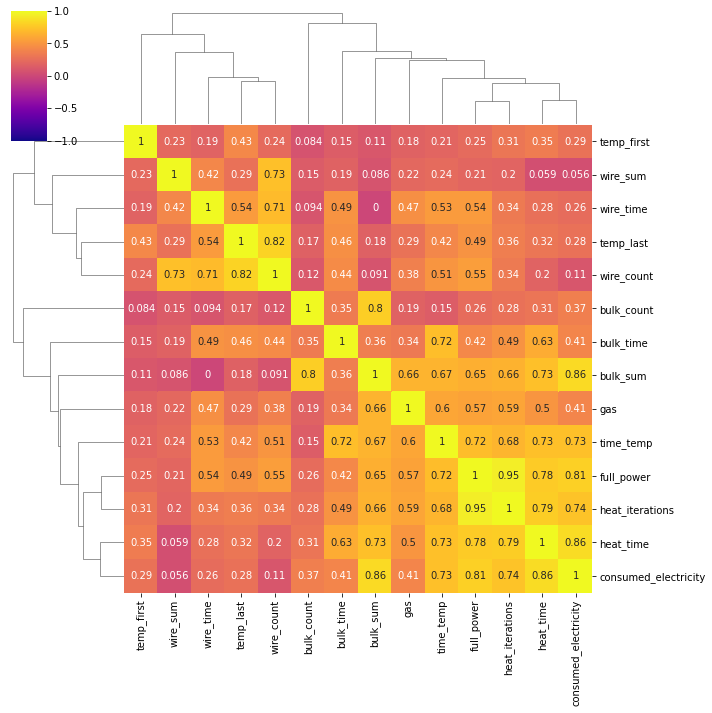

In [ ]:
# список значений интервальных колонок для матрицы
int_cols = [
    'heat_time',
    'full_power',
    'heat_iterations',
    'consumed_electricity',
    'bulk_sum',
    'bulk_count',
    'bulk_time',
    'gas',
    'temp_first',
    'temp_last',
    'time_temp',
    'wire_sum',
    'wire_count',
    'wire_time'
]
sns.clustermap(
    data.phik_matrix(interval_cols=int_cols),
    annot=True,
    vmin=-1,
    vmax=1,
    center=0,
    cmap='plasma')

Метод phik наоборот показывает высокие значения корреляции к целевому признаку:
 - cамую высокую корреляцию с целевым признаком имеет количество итераций проволочных добавок в партии (0,82)
 - среднюю корреляцию имеют: временной интервал между проволочными добавками (0,54), общая затраченная мощность на нагрев (0,49), временной интервал затраченный на сыпучие добавки (0,46) и временной промежуток между первым и последним замерами температуры (0,42).

Признаки мультиколлинеарности в данных не обнаружены, можно приступать к обучению на основании сформированных признаков.

### Выводы по блоку

По итогу исследовательского анализа данных, мы установили, что:
 - новый сформированный датасет с новым набором признаков полностью заполнен, очищен от аномалий и временных данных
 - статистический анализ показывает наличие выбросов практически в каждом признаке, но их доля, как правило незначительная, не способная повлиять на качество обучения, так что, после формирования тренировочной выборки, их будем удалять. При этом сами по себе аномалии вызваны как раз таки большим количеством итераций в отдельных партиях, как по итерациям нагрева, так и по итерациям добавки присадок
 - графический анализ показывает ненормальное смещенное распределение значений по признакам, это может повлиять на качество обучения
 - детальный корреляционный анализ разными методами позволил выявить отсутствие мультиколлинеарности, а также наиболее коррелирующие признаки к целевому

## Шаг. Подготовка данных

**Задача этапа:** Выполнить подготовку данных для обучения модели. Разделить данные на три выборки (тренировочная валидационная, тестовая), очистить тренировочную выборку от аномалий, при масштабировании и кодировании учитывать особенности данных и моделей

### Разделение выборок

In [ ]:
X = data.drop('temp_last',axis = 1)
y = data['temp_last']

Поскольку по условиям задачи необходимо получить соотношение тренировочной и тестовой выборок в соотношении 3/1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=RS
)

print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (1743, 13)
X_test (582, 13)
y_train (1743,)
y_test (582,)


### Очистка тренировочной выборки от выбросов

In [ ]:
# запишем список признаков для очистки от выбросов
features_to_clean = [
    'heat_time',
    'full_power',
    'heat_iterations',
    'consumed_electricity',
    'bulk_sum',
    'bulk_count',
    'bulk_time',
    'gas',
    'temp_first',
    'time_temp',
    'wire_sum',
    'wire_count',
    'wire_time'
]

In [ ]:
# подготовим функцию для очистки признака от выбросов
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [ ]:
# подготовим функцию для очистки тренировочной выборки
def clean_train(data_train):
    size = len(data_train)

    # Последовательно удаляем выбросы по каждому признаку
    for f in features_to_clean:
        data_train = remove_outliers_iqr(data_train, f)
    return data_train

In [ ]:
# объединим X_train и y_train для очистки
data_train_clean = pd.concat([X_train, y_train], axis=1)

In [ ]:
# проведем очистку тренировочной выборки
data_clean = clean_train(data_train_clean)
# разделим обратно
X_train_clean = data_clean.drop('temp_last',axis = 1)
y_train_clean = data_clean['temp_last']
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_train_clean',X_train_clean.shape)
print('y_train_clean',y_train_clean.shape)

X_train (1743, 13)
y_train (1743,)
X_train_clean (1108, 13)
y_train_clean (1108,)


После очистки, тренировочная выборка сократилась до 1010 строк. Но, поскольку выбросы мы убрали, вместо RobustScaler, устойчивый к выбросам, далее для масштабирования будем использовать StandardScaler

## Шаг. Обучение моделей машинного обучения

**Задача этапа:** Обучить как минимум две модели. Хотя бы для одной из них подобрать как минимум два гиперпараметра.

In [ ]:
# подготовим таблицу и словарь для фиксации результата обучения
results = []
best_models = {}

Проведем масштабирование данных в тренировочной и валидацоинной выборках

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test)

Для обучения выбраны следующие модели:
 - LinearRegression - простейшая модель для регрессии
 - RandomForest
 - GradientBoosting
 - SVR
 - XGBoost

Зафиксируем гиперпараметры для моделей, которые будем обучать

In [ ]:
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
            'positive': [False, True]
        }
    },

    'RandomForest': {
        'model': RandomForestRegressor(random_state=RS),
        'params': {
            'n_estimators': [50, 100, 200, 300, 500],
            'max_depth': [None, 10, 20, 30, 50],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 4, 8],
            'max_features': ['sqrt', 'log2', None]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=RS),
        'params': {
            'n_estimators': [50, 100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
            'max_depth': [3, 5, 7, 9],
            'min_samples_split': [2, 5, 10, 15],
            'subsample': [0.8, 0.9, 1.0]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto'],
            'epsilon': [0.01, 0.1, 0.2]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=RS, verbosity=0),
        'params': {
            'n_estimators': [50, 100, 200, 300],
            'max_depth': [3, 5, 7, 9, 13],
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0],
            'colsample_bytree': [0.8, 0.9, 1.0],
            'reg_alpha': [0, 0.1, 1],
            'reg_lambda': [1, 1.5, 2]
        }
    }
}

In [ ]:
# запускаем цикл обучения
for model_name, model_info in models.items():
    print(f"\nОбучение {model_name}")

    start_time = time.time()

    # Перебор гиперпараметров
    if model_name == 'SVR':
     # Только для SVR используем масштабированные данные
        search = RandomizedSearchCV(
            model_info['model'],
            model_info['params'],
            n_iter=30,
            cv=5,
            scoring='neg_mean_absolute_error',
            random_state=RS,
            n_jobs=-1
        )
        search.fit(X_train_scaled, y_train_clean)
        best_model = search.best_estimator_
        y_test_pred = best_model.predict(X_test_scaled)
    else:
        # Для остальных моделей используем исходные данные
        search = RandomizedSearchCV(
            model_info['model'],
            model_info['params'],
            n_iter=30,
            cv=5,
            scoring='neg_mean_absolute_error',
            random_state=RS,
            n_jobs=-1
        )
        search.fit(X_train_clean, y_train_clean)
        best_model = search.best_estimator_
        y_test_pred = best_model.predict(X_test)

    training_time = time.time() - start_time

    # Время предсказания
    predict_start = time.time()
    if model_name == 'SVR':
        _ = best_model.predict(X_test_scaled)
    else:
        _ = best_model.predict(X_test)
    predict_time = time.time() - predict_start

    # Метрика MAE
    mae = mean_absolute_error(y_test, y_test_pred)

    # Сохраняем результаты
    results.append({
        'model': model_name,
        'best_params': search.best_params_,
        'mae_val': mae,
        'training_time': training_time,
        'prediction_time': predict_time
    })

    # Сохраняем лучшую модель
    best_models[model_name] = {
        'model': best_model,
        'scaler': scaler if model_name == 'SVR' else None
    }

    print(f"Лучшие параметры: {search.best_params_}")
    print(f"MAE на валидации: {mae:.4f}")
    print(f"Время обучения: {training_time:.2f} сек")
    print(f"Время предсказания: {predict_time:.4f} сек")


Обучение LinearRegression
Лучшие параметры: {'positive': False, 'fit_intercept': True}
MAE на валидации: 7.0387
Время обучения: 0.30 сек
Время предсказания: 0.0015 сек

Обучение RandomForest
Лучшие параметры: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 50}
MAE на валидации: 6.8486
Время обучения: 65.46 сек
Время предсказания: 0.0293 сек

Обучение GradientBoosting
Лучшие параметры: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 15, 'max_depth': 3, 'learning_rate': 0.05}
MAE на валидации: 6.7025
Время обучения: 105.41 сек
Время предсказания: 0.0036 сек

Обучение SVR
Лучшие параметры: {'kernel': 'linear', 'gamma': 'auto', 'epsilon': 0.01, 'C': 1}
MAE на валидации: 7.0812
Время обучения: 24.59 сек
Время предсказания: 0.0115 сек

Обучение XGBoost
Лучшие параметры: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
MAE на валидации: 

### Вывод по блоку

Лучшей моделью стала модель градиентного бустинга XGBoost, она же показала лучшее время обучения после линейной регрессии и ее оценка MAE самая низкая - 6.63, то есть ее предсказание дает отклонение на 6,63 градуса нагрева, что, с учетом имеющихся в датасете выбросов является приемлемым показателем для избежания перегрева, но в металлургии даже такое отклонение может оказать влияние на качество стали.
В целом  только 2 из 5 обученные модели показали оценку MAE ниже контрольной 6.8, кроме линейной регрессии, случайных лесов и модели опорных векторов - они показали качество хуже требуемого.
Теперь протестируем лучшую модель на тестовой выборке и на Dummy

## Шаг. Выбор лучшей модели и проверка ее качества

**Задача этапа:** Выбрать лучшую модель и проверить её качество на тестовой выборке.

Выведем информацию обо всех обученных моделях с лушими параметрами

In [ ]:
results = pd.DataFrame(results)
results = results.sort_values('mae_val')
results

,model,best_params,mae_val,training_time,prediction_time
4,XGBoost,"{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha...",6.631089,606.515914,0.069237
2,GradientBoosting,"{'subsample': 0.8, 'n_estimators': 200, 'min_s...",6.702518,105.414734,0.003617
1,RandomForest,"{'n_estimators': 200, 'min_samples_split': 2, ...",6.848555,65.458550,0.029328
0,LinearRegression,"{'positive': False, 'fit_intercept': True}",7.038677,0.295897,0.001543
3,SVR,"{'kernel': 'linear', 'gamma': 'auto', 'epsilon...",7.081188,24.593446,0.011540


Самой лучшей стала модель градиентного бустинга XGBoost, однако эта модель дольше всего учится, хотя и показывает высокое время предсказания. Протестируем ее на тестовой выборке, Dummy и выведем график влияния признаков

In [ ]:
best_model_name = results.iloc[0]['model']
best_model_info = best_models[best_model_name]
best_model = best_model_info['model']
y_test_pred = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"MAE на тестовой выборке: {test_mae:.4f}")

MAE на тестовой выборке: 6.6311


In [ ]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train_clean, y_train_clean)
y_dummy_pred = dummy.predict(X_test)
dummy_mae = mean_absolute_error(y_test, y_dummy_pred)

print(f"MAE Dummy модели: {dummy_mae:.4f}")

MAE Dummy модели: 7.8636


МАЕ Dummy выше нашего значения на тесте и выше контрольного значения, а значит наша модель работает корректно

Топ-5 самых важных признаков:
                 feature  importance
8             temp_first    0.127711
0              heat_time    0.106549
11            wire_count    0.099376
3   consumed_electricity    0.096482
9              time_temp    0.088292


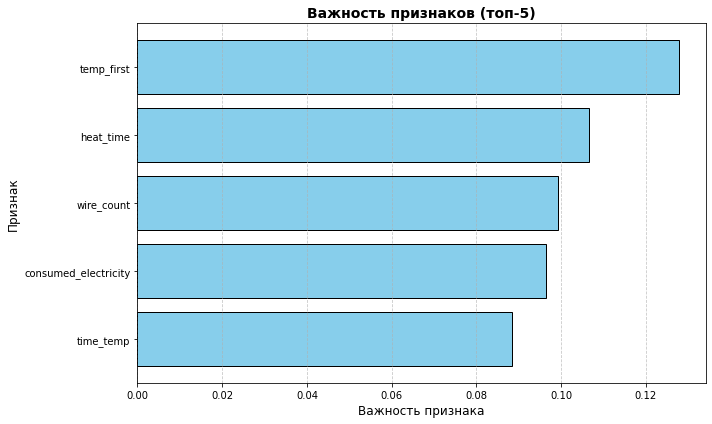

In [ ]:
feature_importance = best_model.feature_importances_
feature_names = X_train.columns

importance_data = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values(by='importance', ascending=False)

print("Топ-5 самых важных признаков:")
print(importance_data.head(5))

plt.figure(figsize=(10, 6))
plt.barh(
    importance_data['feature'].head(5),          # имена признаков (топ-5)
    importance_data['importance'].head(5),      # значения важности
    color='skyblue',
    edgecolor='black'
)
plt.xlabel('Важность признака', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.title('Важность признаков (топ-5)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # самые важные сверху
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

В соответствии с этим графиком, наибольшую важность для предсказания имеет wire_count - количество проволочных присадок. Это объяснимо, так как технологически этот процесс самый последний, и оказывает больше всего влияния на последнюю температуру
За ним идет значение первого замера температуры - это тоже объяснимо, так как у нас изначально посталвено условие анализировать только первый и последний замеры температуры, а другие замеры мы игнорируем
Затем идет время нагрева, затраченная электроэнергия и временной промежуток между первым и последним этапами добавки. Из этих признаков только время нагрева между первой и последней итерациями и затраченная электроэнергия являются признаками связанными с процессом выплавки в целом, а не с его последнийм этапом.

## Шаг. Общий вывод и рекомендации заказчику

**Задача этапа:** Сделайть общий вывод о проделанной работе: описать основные этапы работы, полученные результаты и дать рекомендации для заказчика.

**Общий вывод**

По условиям задачи, необходимо было построить модель, предсказывающую конечную температуру сплава при выплавке стали и имитирующую технологический процесс, чтобы экономить затраченную электроэнергию на процесс нагрева и избегать перегрева стали.

**Работа по этапам:**

1. Загрузка и первичный осмотр данных;
2. Исследовательский анализ и предобработка данных;
3. Объединение данных
4. Исследовательский анализ объединенных данных
5. Подготовка данных к обучению
6. Обучение моделей машинного обучения
7. Выбор лучшей модели


<h3>Загрузка и первичный осмотр данных</h3>
На этом этапе были загружены 7 датафреймов с данными на разных этапах технологического процесса выплавки стали

<h3>Исследовательский анализ и предобработка</h3>
На этом этапе был проведен первичный исследовательский анализ данных, в ходе котрого установлено, что:
 - В данных разных датафреймов есть пропуски, часть из них номальные, часть аномальные
 - Выявлены аномальные значения
В ходе предобработки данных, данные бвли подготволены к объединению:
 - переименовали столбцы и привели к единому "змеиному" стилю
 - удалили аномалии в reactive_power
 - заполнили пропуски 0-ми в датафреймах характеризующих присадки
 - в датафрейме с замерами температуры удалили строки с пропусками данных, а также строки где всего один замер температуры
 - сформировали новые признаки на основании датафреймов для обучения моделей:
    - на основе датафрейма data_arс сформировали признаки: суммарного времени затраченного на нагрев для каждой партии, полной мощности затраченной на нагрев для каждой партии, количество итераций нагрева для каждой партии, количество суммарной электроэнергии затраченной на нагрев каждой партии
    - на основании датафреймов с объемом сыпучих присадок data_bulk и data_bulk_time сформировали признаки: суммарный объем сыпучих присадок затраченных на партию, количество итераций добавки присадок, временной промежуток между первой и последней итерациями добавки сыпучих присадок
    - на основании датафрейма с замерами температуры data_temp сформированы признаки: температуры первого и температура последнего замера в партии, временной промежуток между первым и последним замерами температуры
    - на основании датафреймов с объемом проволочных присадок data_wire и data_wire_time сформированы признаки: суммарный объем проволочных присадок, количество итераций добавки присадок, временной промежуток между первой и последней итераций добавки проволочных присадок.

<h3>Объединение данных</h3>
По итогу объединения таблиц получен один датафрейм с пригодными для обучения признаками без пропусков. Итоговый датафрейм состоит из 2329 записей и 13 колонок, где 12 колонок будут входными признаками, одна колонка temp_last будет целевым признаком, а колонка key будет использоваться в качестве индекса.

<h3>Исследовательский анализ объединенных данных</h3>
По итогу исследовательского анализа данных, установлено, что:
 - новый сформированный датасет с новым набором признаков полностью заполнен, очищен от аномалий и временных данных
 - статистический анализ показал наличие выбросов практически в каждом признаке, но их доля незначительная, так что их удалили
 - графический анализ показал ненормальное смещенное распределение значений по признакам
 - детальный корреляционный анализ разными методами позволил выявить отсутствие мультиколлинеарности, а также наиболее коррелирующие признаки к целевому

<h3>Подготовка данных</h3>
В ходе подготовки данных,объединеный датафрейм разделен на тренировочную, валидационную и тестовую выборки в соотношении 3/1/1
После разделения выборок тренировочные данные перед обучением были очищены от выбросов по методу IQR - межквартильному размаху.

<h3>Обучение моделей машинного обучения</h3>
Для обучения моделей были выбраны 5 моделей часто используемых в регрессии:
 - LinearRegression
 - RandomForest
 - GradientBoosting
 - SVR
 - XGBoost
По итогу обучения и подбора гиперпараметров была собрана рейтинговая таблица с лучшими результатами обучения для каждой модели

<h3>Выбор лучшей модели</h3>
По итогу анализа полученной таблицы, лучшей моделью была признана модель XGBoost, показавшая MAE 6.7 на валидационной выбррке и 6,65 на тестовой. Именно эта модель с этим набором гиперпараметров рекоментдуется для использования.

<h3>Рекомендации</h3>
Основной задачей этого проекта была имитация производственного проекта, чтобы предсказывать конечную температуру нагрева, чтобы избежать перегрева заготовок и рассчитывать экономику в виде затраченноой электроэнергии на каждую партию выплавки стали.

Однако, в условиях предоставленных ограничений, мы можем предсказывать конечную температуру плавления, но это слабо соотносится с самим производственным процессом. Для полноценной имитации технологического процесса, необходимо не рассчитывать конечную температуру всего процесса, а каждой итерации нагрева, до достижения конечного результата. Как видно из данных на саму экономику процесса влияют не только объемы добавок в процессе выплавки стали и затраченная энергия на нагрев, но и немаловажным является количество итераций нагрева, которые необходимо сводить к минимуму, иначе будет необоснованные затраты электроэнергии, особенно в условиях холостого нагрева, что было по некоторым партиям.

В связи с этим, рекомендуется:
 - изучить причины пропуска в критичных данных вроде отсутствующей информации по партиям, пропуска данных в замерах температуры и т.п. Устранить эти причины, чтобы получить больше данных для обучения
 - для целей имитации технологического процесса изменить вводные и ограничения на проект: необходимо строить расчеты итерационно, а не от двух временных точек: первого замера и последнего замера. Так мы добьемся более точного результата в каждую итерацию нагрева, и более точного расчета экономики процесса. Соответственно предсказание последней необходимой температуры нагрева будет сроиться уже на данных предыдущей итерации и текущих вводных в виде объема добавляемых присадок.
 - рассмотреть вариант расчета требуемой температуры на основе простых математических моделей, с учетом марки стали, необходимой температуры нагрева, в соответствии с химическим составом каждого итерационного подхода к выплавке. В случае отсутствия таких данных их можно выявить путем исследования ранее проведенных выплавок. Такой подход может обеспечить более четкий контроль качества производства и производимой продукции.